# câu 2: Nhận dạng kí tự


## Import thư viện

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## Load dữ liệu

In [3]:
df = pd.read_csv('./data/letter-recognition.data', header=None)
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Thông tin data

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

### Kết luận
+ không thấy missing value
+ có 20000 mẫu

## Chuẩn bị dữ liệu

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Biểu diễn Histogram cho các feature

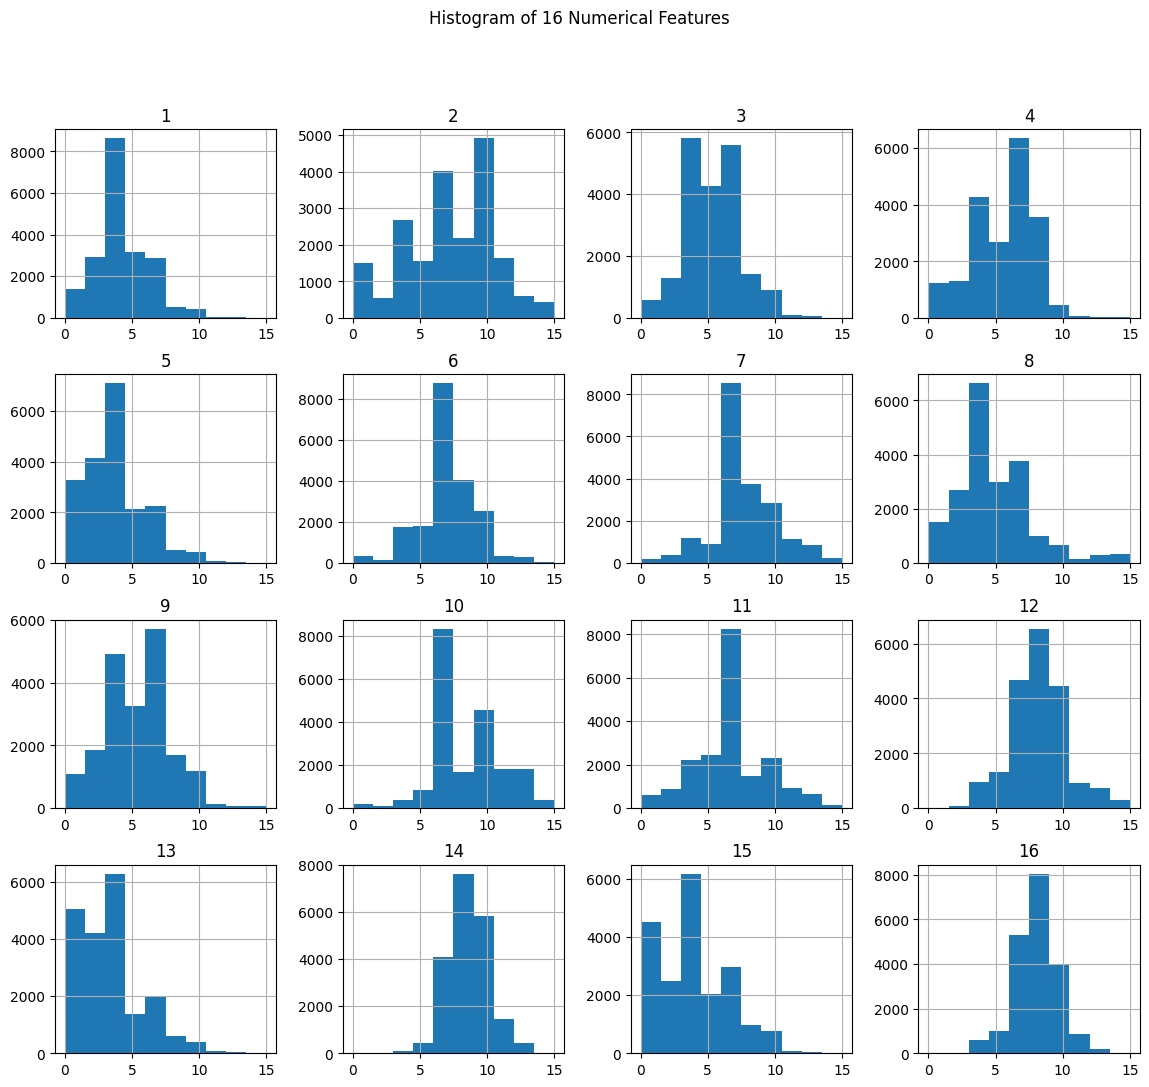

In [8]:
df.iloc[:, 1:].hist(figsize=(14,12))
plt.suptitle("Histogram of 16 Numerical Features")
plt.show()


## chuẩn hóa dữ liệu


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Naive Bayes thủ công

In [12]:
class MyGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9
            self.prior[c] = X_c.shape[0] / X.shape[0]

    def gaussian_pdf(self, x, mean, var):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x-mean)**2) / (2 * var))

    def predict_one(self, x):
        posteriors = {}

        for c in self.classes:
            prior = np.log(self.prior[c])
            likelihood = np.sum(np.log(self.gaussian_pdf(x, self.mean[c], self.var[c])))
            posteriors[c] = prior + likelihood
        
        return max(posteriors, key=posteriors.get)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

## Train thủ công

In [13]:
nb = MyGaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_manual = nb.predict(X_test_scaled)

print("Manual Gaussian NB Accuracy:", accuracy_score(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual))


Manual Gaussian NB Accuracy: 0.648
              precision    recall  f1-score   support

           A       0.86      0.91      0.88       149
           B       0.51      0.69      0.59       153
           C       0.70      0.70      0.70       137
           D       0.60      0.78      0.68       156
           E       0.62      0.40      0.48       141
           F       0.65      0.74      0.69       140
           G       0.55      0.54      0.55       160
           H       0.51      0.31      0.39       144
           I       0.56      0.77      0.65       146
           J       0.84      0.74      0.79       149
           K       0.49      0.45      0.47       130
           L       0.99      0.76      0.86       155
           M       0.70      0.90      0.79       168
           N       0.89      0.67      0.77       151
           O       0.48      0.74      0.58       145
           P       0.89      0.73      0.80       173
           Q       0.63      0.55      0.59   

## Huấn luyện mô hình Naive Bayes


In [14]:
model = GaussianNB()
model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


# Dự đoán

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.648
              precision    recall  f1-score   support

           A       0.86      0.91      0.88       149
           B       0.51      0.69      0.59       153
           C       0.70      0.70      0.70       137
           D       0.60      0.78      0.68       156
           E       0.62      0.40      0.48       141
           F       0.65      0.74      0.69       140
           G       0.55      0.54      0.55       160
           H       0.51      0.31      0.39       144
           I       0.56      0.77      0.65       146
           J       0.84      0.74      0.79       149
           K       0.49      0.45      0.47       130
           L       0.99      0.76      0.86       155
           M       0.70      0.90      0.79       168
           N       0.89      0.67      0.77       151
           O       0.48      0.74      0.58       145
           P       0.89      0.73      0.80       173
           Q       0.63      0.55      0.59       166
           

# Tóm lại
+ Accuracy thường khoảng 60%–75% tùy train/test
+ Naive Bayes chạy cực nhanh
+ Độ chính xác không cao bằng KNN